In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re

In [ ]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns',8000)
pd.set_option('display.max_rows',7000)

In [ ]:
from google.colab import files
files.upload()

Saving test_tweets_anuFYb8.csv to test_tweets_anuFYb8.csv
Saving train_E6oV3lV.csv to train_E6oV3lV.csv


{'test_tweets_anuFYb8.csv': b'id,tweet\n31963,#studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterials\xc3\xa2\xc2\x80\xc2\xa6 \n31964, @user #white #supremacists want everyone to see the new \xc3\xa2\xc2\x80\xc2\x98  #birds\xc3\xa2\xc2\x80\xc2\x99 #movie \xc3\xa2\xc2\x80\xc2\x94 and here\xc3\xa2\xc2\x80\xc2\x99s why  \n31965,safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!! \n31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? \xc3\xb0\xc2\x9f\xc2\x98\xc2\x8d\xc3\xb0\xc2\x9f\xc2\x98\xc2\x8d\xc3\xb0\xc2\x9f\xc2\x98\xc2\x8d   #harrypotter #pottermore #favorite"\n31967,"  3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and misses\xc3\xa2\xc2\x80\xc2\xa6 "\n31968,choose to be   :) #momtips \n31969,something inside me dies \xc3\xb0\xc2\x9f\xc2\x92\xc2\xa6\xc3\xb0\xc2\x9f\xc2\x92\xc2\xbf\xc3\xa2\xc2\x9c\xc2\xa8  eyes ness #smokeyeyes #tired  #lonely #sof #grunge\xc

In [61]:
train=pd.read_csv('train_E6oV3lV.csv')
test=pd.read_csv('test_tweets_anuFYb8.csv')

In [77]:
train.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  \
0   user when father dysfunctional and selfish dr...   
1   user user thanks for lyft credit can use caus...   
2                                bihday your majesty   
3                 model love take with all the time    
4                  factsguide society now motivation   

                                         tweet_token  \
0  [user, when, father, dysfunctional, and, selfi...   
1  [user, user, thanks, for, lyft, credit, can, u...   
2                            [bihday, your, majesty]   
3          [model, love, take, with, all, the, time]   
4             [factsguide, society, now, motivation]   

                                          stem_tweet  
0  [[user, father, dysfunctional, selfish, drag, ...  
1  [[user, user, thanks, lyft, credit, can, use, ...  
2                                [[bihday, majesty]]  
3                        [[model, love, take, time]]  
4           [[factsguide, society, now, motivation]]

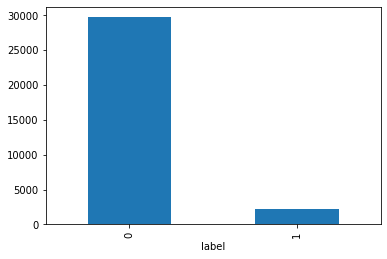

In [63]:
train.groupby('label').size().plot(kind='bar')

In [78]:
test.head()

id                                              tweet  \
0  31963  #studiolife #aislife #requires #passion #dedic...   
1  31964   @user #white #supremacists want everyone to s...   
2  31965  safe ways to heal your #acne!!    #altwaystohe...   
3  31966  is the hp and the cursed child book up for res...   
4  31967    3rd #bihday to my amazing, hilarious #nephew...   

                                         clean_tweet  \
0   studiolife aislife requires passion dedicatio...   
1   user white supremacists want everyone see the...   
2  safe ways heal your acne altwaystoheal healthy...   
3   the and the cursed child book for reservation...   
4   bihday amazing hilarious nephew eli ahmir unc...   

                                         tweet_token  \
0  [studiolife, aislife, requires, passion, dedic...   
1  [user, white, supremacists, want, everyone, se...   
2  [safe, ways, heal, your, acne, altwaystoheal, ...   
3  [the, and, the, cursed, child, book, for, rese...   
4  [bihday, amazing, hilarious, nephew, eli, ahmi...   

                                          stem_tweet  
0  [[studiolife, aislife, requires, passion, dedi...  
1  [[user, white, supremacist, want, everyone, se...  
2  [[safe, way, heal, acne, altwaystoheal, health...  
3  [[cursed, child, book, reservation, already, y...  
4  [[bihday, amazing, hilarious, nephew, eli, ahm...

In [65]:
def cleaning(Inpdata):
    cleanedArticle1=re.sub(r'user[?|$|(),"".@#=><|!]Â&*/',r' ',Inpdata)
    cleanedArticle2=re.sub(r'[^a-z A-Z]',r' ',cleanedArticle1)
    cleanedArticle3=cleanedArticle2.lower()
    cleanedArticle4=re.sub(r'\b\w{1,2}\b', ' ',cleanedArticle3)
    cleanedArticle5=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle4)
    cleanedArticle6=re.sub(r' +', ' ',cleanedArticle5)
    return(cleanedArticle6)

In [66]:
train['clean_tweet']=train['tweet'].apply(cleaning)

In [67]:
test['clean_tweet']=test['tweet'].apply(cleaning)

In [68]:
def Token_new(inpdata):
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(inpdata)
    return(tokens)

In [69]:
train['tweet_token']=train['clean_tweet'].apply(Token_new)

In [70]:
test['tweet_token']=test['clean_tweet'].apply(Token_new)

In [71]:
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [72]:
def Stem_Stop(Inpdata):
    texts=[]
    en_stop = get_stop_words('en')
    ps=WordNetLemmatizer()
    stopped_tokens = [i for i in Inpdata if not i in en_stop]
    porter_stem=[ps.lemmatize(word) for word in stopped_tokens ]
    texts.append(porter_stem)
    return(texts)

In [73]:
train['stem_tweet']=train['tweet_token'].apply(Stem_Stop)

In [74]:
test['stem_tweet']=test['tweet_token'].apply(Stem_Stop)

In [75]:
corp_train=train.clean_tweet
document_train=[''.join(str(text))for text in corp_train]

In [76]:
corp_test=test.clean_tweet
document_test=[''.join(str(text))for text in corp_test]

In [ ]:
len(np.unique(corp_train))

29242

In [ ]:
len(np.unique(corp_test))

16014

In [ ]:
###############################################

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation,Dropout
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [80]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [81]:
token=Tokenizer()
token.fit_on_texts(document_train)

In [82]:
vocab_size=len(token.word_index)+1
vocab_size

37106

In [83]:
print(token.index_word)

{1: 'user', 2: 'the', 3: 'you', 4: 'and', 5: 'for', 6: 'love', 7: 'this', 8: 'with', 9: 'day', 10: 'that', 11: 'all', 12: 'are', 13: 'amp', 14: 'happy', 15: 'your', 16: 'have', 17: 'can', 18: 'just', 19: 'will', 20: 'when', 21: 'not', 22: 'like', 23: 'life', 24: 'what', 25: 'time', 26: 'but', 27: 'today', 28: 'from', 29: 'now', 30: 'new', 31: 'thankful', 32: 'out', 33: 'positive', 34: 'get', 35: 'was', 36: 'people', 37: 'bihday', 38: 'good', 39: 'about', 40: 'how', 41: 'our', 42: 'they', 43: 'one', 44: 'see', 45: 'smile', 46: 'more', 47: 'don', 48: 'who', 49: 'father', 50: 'want', 51: 'take', 52: 'work', 53: 'fun', 54: 'healthy', 55: 'weekend', 56: 'summer', 57: 'has', 58: 'there', 59: 'make', 60: 'family', 61: 'got', 62: 'friday', 63: 'days', 64: 'beautiful', 65: 'best', 66: 'friends', 67: 'here', 68: 'great', 69: 'his', 70: 'need', 71: 'way', 72: 'why', 73: 'bull', 74: 'only', 75: 'going', 76: 'first', 77: 'really', 78: 'their', 79: 'music', 80: 'morning', 81: 'wait', 82: 'world', 83

In [84]:
token_test=Tokenizer()
token_test.fit_on_texts(document_test)

In [85]:
vocab_size_test=len(token_test.word_index)+1
vocab_size_test

25202

In [86]:
encoded_train=token.texts_to_sequences(document_train)
encoded_test=token.texts_to_sequences(document_test)

In [87]:
print(encoded_train)

[[1, 20, 49, 14568, 4, 2505, 6042, 69, 215, 219, 69, 7398, 407], [1, 1, 135, 5, 5153, 2246, 17, 392, 584, 42, 47, 1416, 7399, 9516, 7400, 14569, 9517], [37, 15, 3108], [110, 6, 51, 8, 11, 2, 25], [2675, 1278, 29, 256], [947, 629, 6043, 4, 222, 636, 207, 42, 328, 3667, 4, 154, 14570, 20, 42, 34, 58, 14571], [1, 1957, 84, 1, 1, 1, 1, 1, 1, 1, 4020], [2, 117, 220, 123, 2, 123, 5, 1886, 17, 96, 39, 10, 220, 1886, 187, 1279, 3668, 14572, 103], [241, 6, 2, 1225, 6044, 1055, 3372, 1374, 14573], [1, 1, 659, 67], [1197, 2506, 1280, 1809, 351, 9518, 28, 979, 203, 102, 140, 133, 162], [12, 2505, 92, 9519, 2887, 722, 14574, 2505, 1417, 2888, 6], [34, 44, 466, 27, 63, 14575], [1, 1569, 1418, 7401, 1514, 220, 1741, 2, 1570, 7402, 1810], [1321, 1130, 5154, 1675, 7403, 6045, 7403], [3669, 3373, 216, 61, 3373, 14576, 371], [31, 5, 217, 1515, 31, 33], [395, 3, 820], [174, 62, 452, 11, 231, 146, 1, 1, 2373, 59, 36], [11, 86, 1811, 2044, 12, 21, 191, 9520], [270, 36, 4021, 5, 14577, 1621, 35, 1281, 5155, 

In [88]:
max_length=60
X=pad_sequences(encoded_train,maxlen=max_length,padding='post')

In [89]:
y=train['label'].values

In [90]:
glove_vectors=dict()

In [91]:
file=open('glove.twitter.27B.50d.txt', encoding='utf-8')
for line in file:
  values=line.split()
  word= values[0]
  vectors=np.asarray(values[1:])
  glove_vectors[word]=vectors
file.close()  

In [92]:
len(glove_vectors.keys())

1193514

In [93]:
glove_vectors.get('love').shape

(50,)

In [94]:
word_vetor_matrix=np.zeros((vocab_size,50))
for word, index in token.word_index.items():
    vector=glove_vectors.get(word)
    if vector is not None:
      word_vetor_matrix[index]=vector
    else:
      print(word)  

Streaming output truncated to the last 5000 lines.
headfullofdreamstour
roofdown
teamade
sixmonths
thethingsthatwearemadeof
sleepday
onice
iceamericano
mourette
sharelove
eahling
americanextremism
simbone
ndlulamthi
manskap
ivehadbothexperiences
trainwiththebest
admen
mdeaf
twitfox
depaments
flameofhopeawards
corporatecharitychampionoftheyear
ineedtogrieve
kindoflifestyle
pjharvey
somosunday
drivefie
hottt
inveed
sorrybradley
kolianwali
ravisidhu
livehappilly
thoughtcast
amliees
opinionisjustthat
sesalefueeadele
relasing
bestyet
familypictures
familyshoot
bharjari
duschszene
beforheadingout
felford
forfunonly
boyrobot
argvven
teammatte
nojustice
loserpizza
recirculates
whenwecelebrate
russianvodka
gooooooooooooooo
rossettorosso
nonsenevaaaaa
jllmena
wundersch
milesforsmiles
cslh
hospitallity
dropadresssize
mixedmaialas
rachelmaddow
rhashtags
epitomeofsorrow
defineepitome
cumshow
hmmmmmm
mysaintpaul
harrypotterworld
freakinghappy
halaaaaa
unitedstateschampion
uschampion
sdlive
tangledfx

In [ ]:
#### keras Model

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=52,test_size=0.25,stratify=y)

In [104]:
vec_size=50
model=Sequential()
model.add(Embedding(vocab_size,vec_size,input_length=max_length,weights=[word_vetor_matrix],trainable=False))
model.add(Conv1D(64,8,activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
750/750 [==============================] - 10s 13ms/step - loss: 0.1896 - accuracy: 0.9343 - val_loss: 0.1566 - val_accuracy: 0.9407
Epoch 2/50
750/750 [==============================] - 9s 12ms/step - loss: 0.1578 - accuracy: 0.9413 - val_loss: 0.1502 - val_accuracy: 0.9443
Epoch 3/50
750/750 [==============================] - 9s 12ms/step - loss: 0.1450 - accuracy: 0.9466 - val_loss: 0.1432 - val_accuracy: 0.9447
Epoch 4/50
750/750 [==============================] - 9s 12ms/step - loss: 0.1332 - accuracy: 0.9511 - val_loss: 0.1378 - val_accuracy: 0.9473
Epoch 5/50
750/750 [==============================] - 10s 13ms/step - loss: 0.1236 - accuracy: 0.9544 - val_loss: 0.1406 - val_accuracy: 0.9482
Epoch 6/50
750/750 [==============================] - 9s 12ms/step - loss: 0.1161 - accuracy: 0.9582 - val_loss: 0.1363 - val_accuracy: 0.9494
Epoch 7/50
750/750 [==============================] - 9s 13ms/step - loss: 0.1098 - accuracy: 0.9599 - val_loss: 0.1372 - val_accuracy: 0.94

In [105]:
max_length=60
X_Test=pad_sequences(encoded_test,maxlen=max_length,padding='post')

In [106]:
predictions=model.predict_classes(X_Test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [111]:
sub_df=pd.DataFrame(test,columns=['id'])
sub_df['label']=predictions

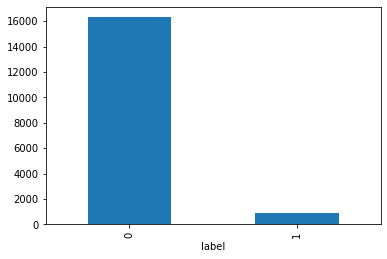

In [112]:
sub_df.groupby('label').size().plot(kind='bar')

In [114]:
sub_df.to_csv('sub_df.csv',index=False)